In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [610]:
df = pd.read_csv('C:/workspace/Python/머신러닝 플젝/hotel_bookings_cancel.csv', header = 0)

In [611]:
df = df.drop(['reservation_status'], axis = 1)

In [612]:
df['children'] = df['children'].fillna(0)
df['babies'] = df['babies'].fillna(0)

In [613]:
df['agent'] = df['agent'].fillna(0)
df.loc[df.agent != 0,'agent'] = 1 #df[df.loc[df['agent'] != 0]] = 1

df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [614]:
df["kids"] = df["children"] + df["babies"]

In [615]:
df.loc[df.kids != 0, 'kids'] = 1
df['kids'].value_counts()
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [616]:
df['kids'].value_counts()

0.0    110058
1.0      9332
Name: kids, dtype: int64

df["total_guest"] = df["adults"] + df["children"] + df["babies"]
df.shape
df["total_nights"] = df["stays_in_weekend_nights"]+ df["stays_in_week_nights"]

In [617]:
df_ml = df.drop(["adults", "children", "babies", "assigned_room_type", "reserved_room_type","arrival_date_day_of_month", "required_car_parking_spaces", "total_of_special_requests"], axis = 1)
print(df.shape, df_ml.shape)

(119390, 24) (119390, 16)


In [618]:
df_ml

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,customer_type,adr,kids
0,0,342,July,0,0,BB,Direct,0,0,0,3,No Deposit,0.0,Transient,0.0,0.0
1,0,737,July,0,0,BB,Direct,0,0,0,4,No Deposit,0.0,Transient,0.0,0.0
2,0,7,July,0,1,BB,Direct,0,0,0,0,No Deposit,0.0,Transient,75.0,0.0
3,0,13,July,0,1,BB,Corporate,0,0,0,0,No Deposit,1.0,Transient,75.0,0.0
4,0,14,July,0,2,BB,Online TA,0,0,0,0,No Deposit,1.0,Transient,98.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,464,October,0,2,BB,Groups,0,0,0,0,Non Refund,1.0,Transient,65.0,0.0
119386,1,464,October,0,2,BB,Groups,0,0,0,0,Non Refund,1.0,Transient,65.0,0.0
119387,1,464,October,0,2,BB,Groups,0,0,0,0,Non Refund,1.0,Transient,65.0,0.0
119388,1,464,October,0,2,BB,Groups,0,0,0,2,Non Refund,1.0,Transient,65.0,0.0


In [619]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [545]:
df_ml['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [546]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [547]:
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [548]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   stays_in_weekend_nights         119390 non-null  int64  
 2   stays_in_week_nights            119390 non-null  int64  
 3   is_repeated_guest               119390 non-null  int64  
 4   previous_cancellations          119390 non-null  int64  
 5   previous_bookings_not_canceled  119390 non-null  int64  
 6   booking_changes                 119390 non-null  int64  
 7   agent                           119390 non-null  float64
 8   adr                             119390 non-null  float64
 9   kids                            119390 non-null  float64
 10  arrival_date_month_April        119390 non-null  uint8  
 11  arrival_date_month_August       119390 non-null  uint8  
 12  arrival_date_mon

In [549]:
over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

In [550]:
df_ml['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [551]:
df_ml['kids'].value_counts()

0.0    110058
1.0      9332
Name: kids, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


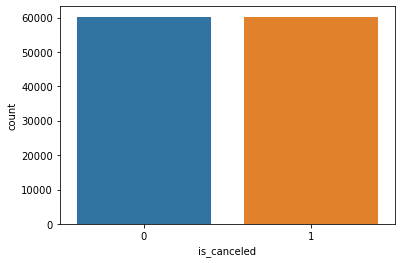

In [552]:
sns.countplot(y_train);

In [553]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7395241889962479
평가 데이터 점수 : 0.746168020772259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [554]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [555]:
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

In [556]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7415496231364346
평가 데이터 점수 : 0.7509422899740347


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [557]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [582]:
df_ml_test = df_ml.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'meal', 'arrival_date_month', 'kids', 'agent', 'adr', 'booking_changes', ], axis = 1)

In [607]:
df_ml_test2 = df_ml[['market_segment', 'lead_time', 'customer_type', 'is_canceled']]

In [608]:
df_ml_test2

,market_segment,lead_time,customer_type,is_canceled
0,Direct,342,Transient,0
1,Direct,737,Transient,0
2,Direct,7,Transient,0
3,Corporate,13,Transient,0
4,Online TA,14,Transient,0
...,...,...,...,...
119385,Groups,464,Transient,1
119386,Groups,464,Transient,1
119387,Groups,464,Transient,1
119388,Groups,464,Transient,1


In [583]:
df_ml_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   is_canceled                     119390 non-null  int64 
 1   lead_time                       119390 non-null  int64 
 2   market_segment                  119390 non-null  object
 3   is_repeated_guest               119390 non-null  int64 
 4   previous_cancellations          119390 non-null  int64 
 5   previous_bookings_not_canceled  119390 non-null  int64 
 6   deposit_type                    119390 non-null  object
 7   customer_type                   119390 non-null  object
dtypes: int64(5), object(3)
memory usage: 7.3+ MB


In [621]:
X = df_ml_test2.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml_test2['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.6732327257030912
평가 데이터 점수 : 0.6858195828796382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [646]:
for i in range(2,16):
    X = df_ml.iloc[:, 1:i]
    y = df_ml.iloc[:, 0]
    
    X = pd.get_dummies(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    print(i, "개 특성을 적용한 score: {:.3f}".format(lr.score(X_test, y_test)))

2 개 특성을 적용한 score: 0.661
3 개 특성을 적용한 score: 0.664
4 개 특성을 적용한 score: 0.667
5 개 특성을 적용한 score: 0.667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 개 특성을 적용한 score: 0.666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7 개 특성을 적용한 score: 0.684


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8 개 특성을 적용한 score: 0.684


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9 개 특성을 적용한 score: 0.697


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 개 특성을 적용한 score: 0.698


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11 개 특성을 적용한 score: 0.710


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


12 개 특성을 적용한 score: 0.773


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


13 개 특성을 적용한 score: 0.773


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14 개 특성을 적용한 score: 0.775
15 개 특성을 적용한 score: 0.773


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), np.sort(model.feature_importances_)[::-1], align = 'center')
    plt.yticks(np.arange(n_features), bean_features_sorted)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    
plot_feature_importances_beans(forest)